In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from cleaning_script import feature_plot, transformation_plot, ORDINAL, NOMINAL, CONTINUOUS, DISCRETE


Read in improved data

In [15]:
house_train = pd.read_csv('../datasets/house_train_improved.csv')
house_test = pd.read_csv('../datasets/house_test_improved.csv')

Declare variables we engineered in the correlations notebook

In [16]:
ENGINEERED = ['overall_qual_cond',
 'basement_cond',
 '2nd_story',
 'total_bath',
 'total_porch_sf',
 'neighborhood_price_rank',
 'updated',
 'garage_age',
 'garage_qual_cond',
 'house_age',
 'house_age',
 'has_pool',
 'meltdown']

In [17]:
%store -r correlative_factors

c:\Users\alexs\Documents\dsir-1031\projects\project_2\code\cleaning_script.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 3, figsize=(15,5))


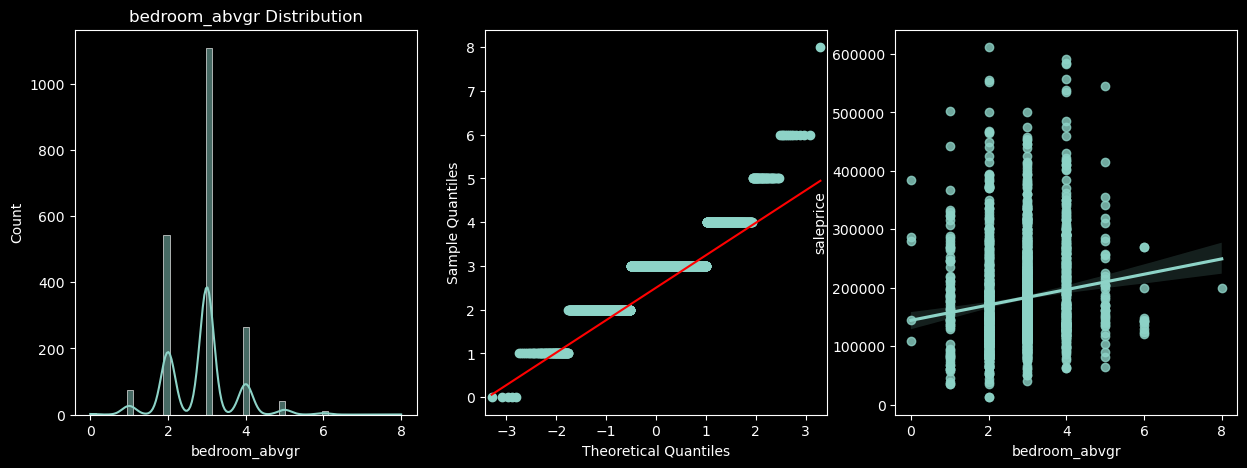

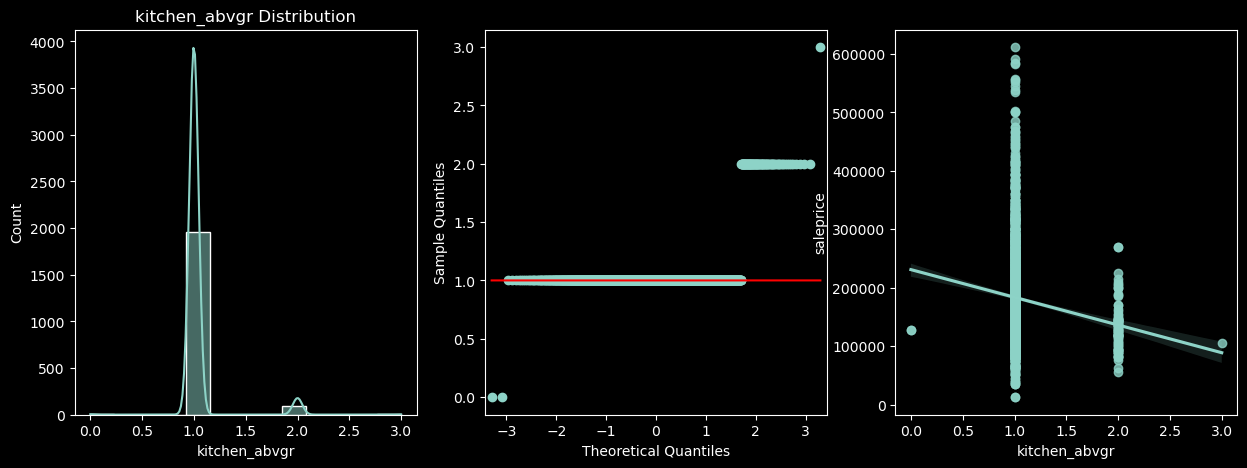

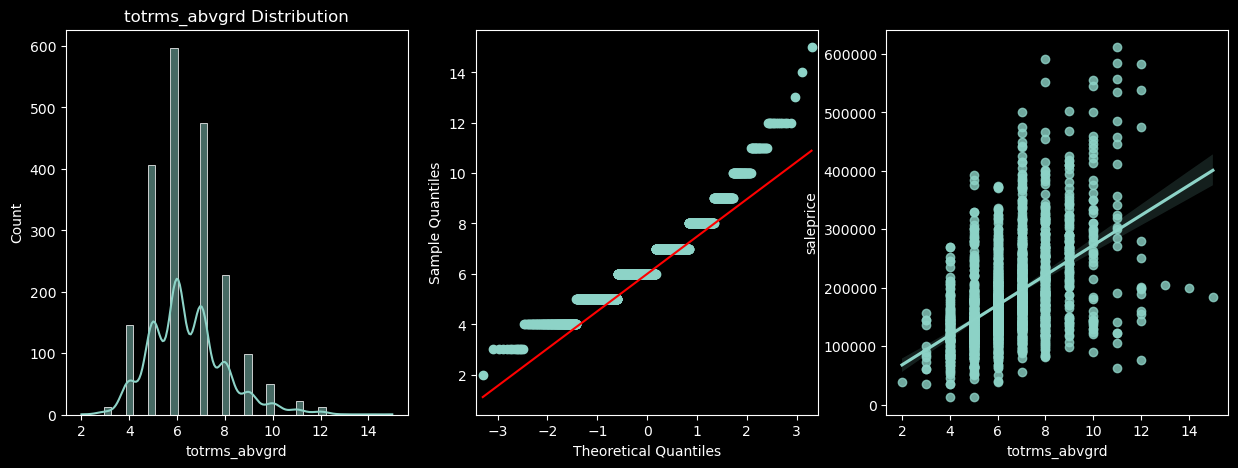

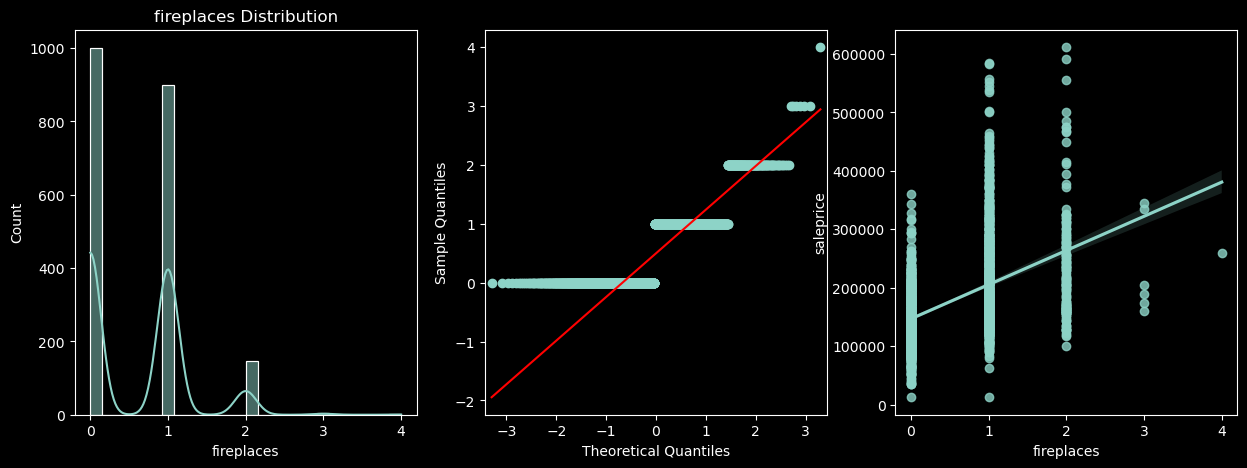

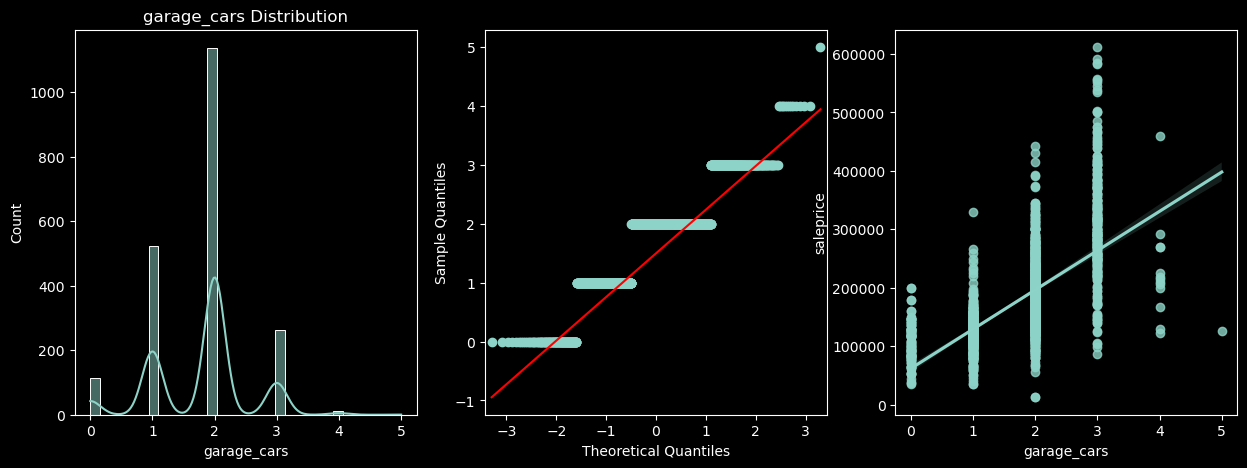

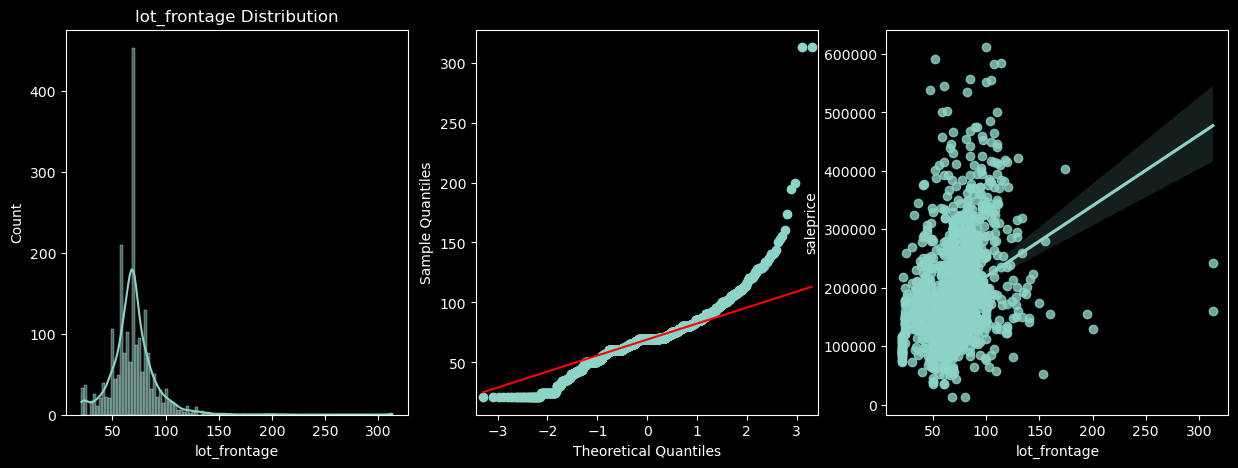

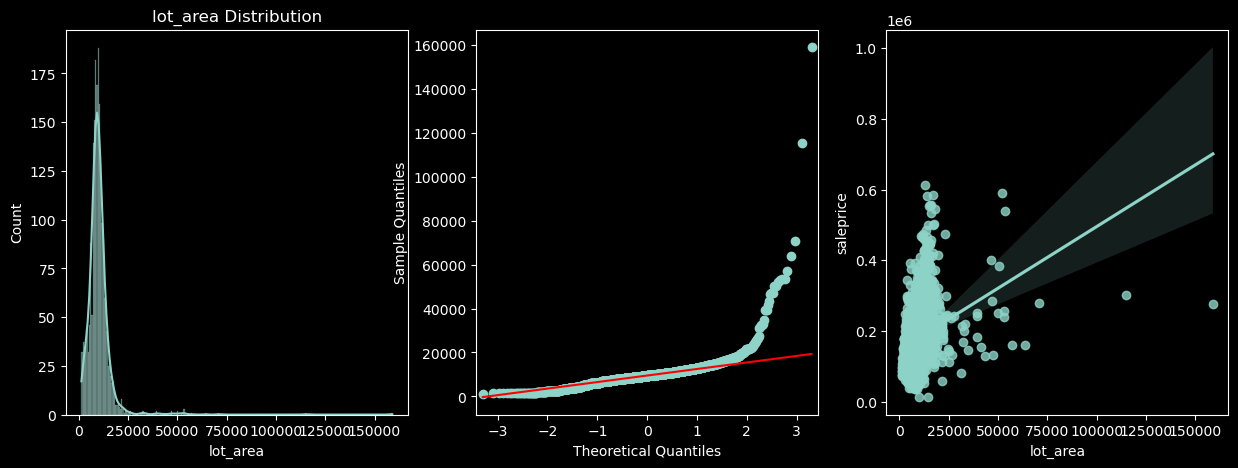

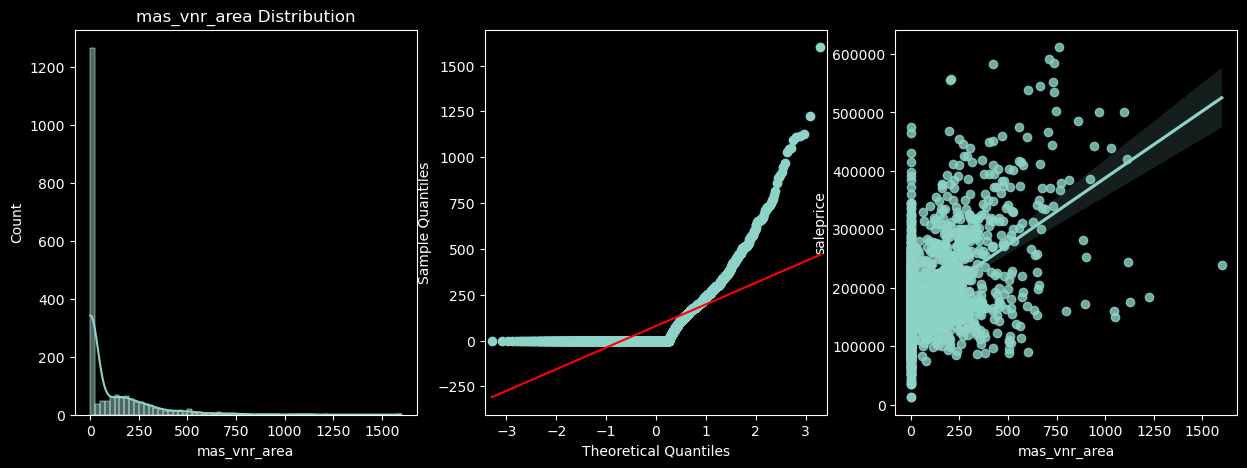

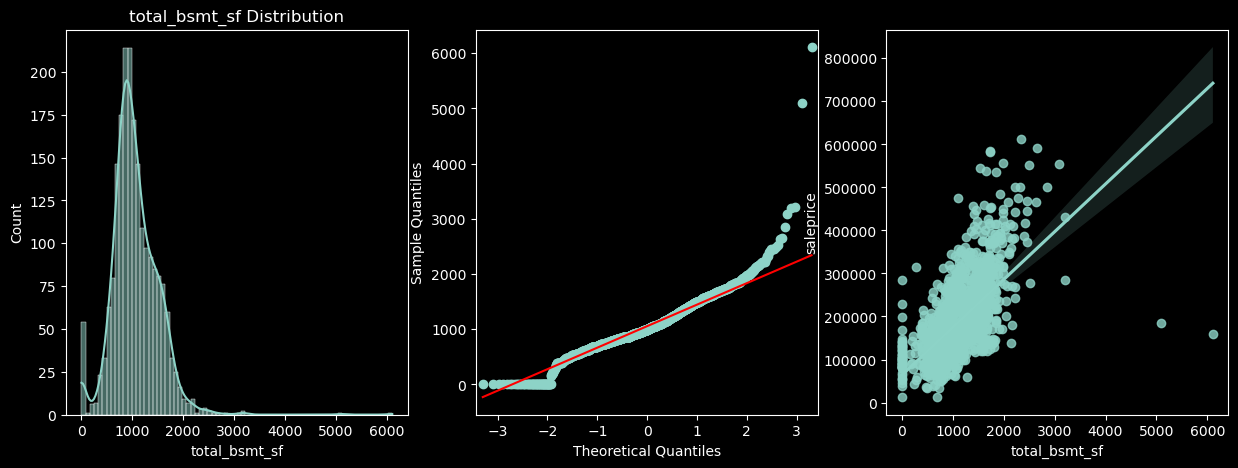

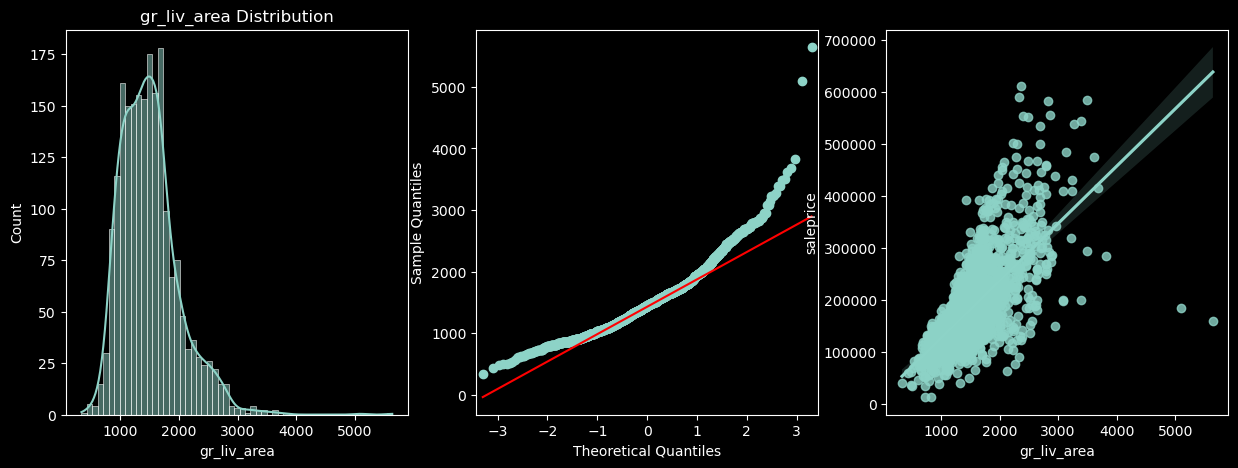

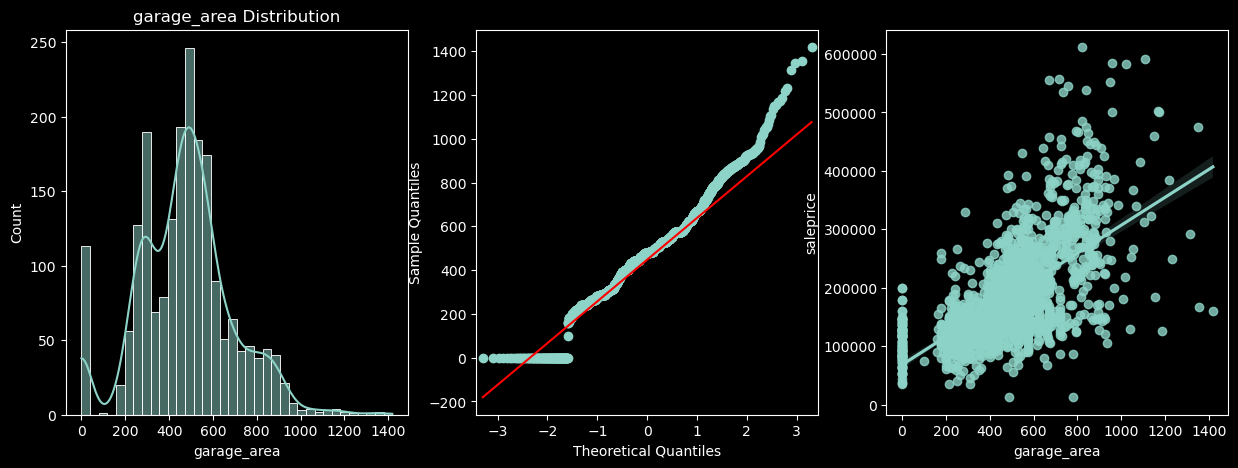

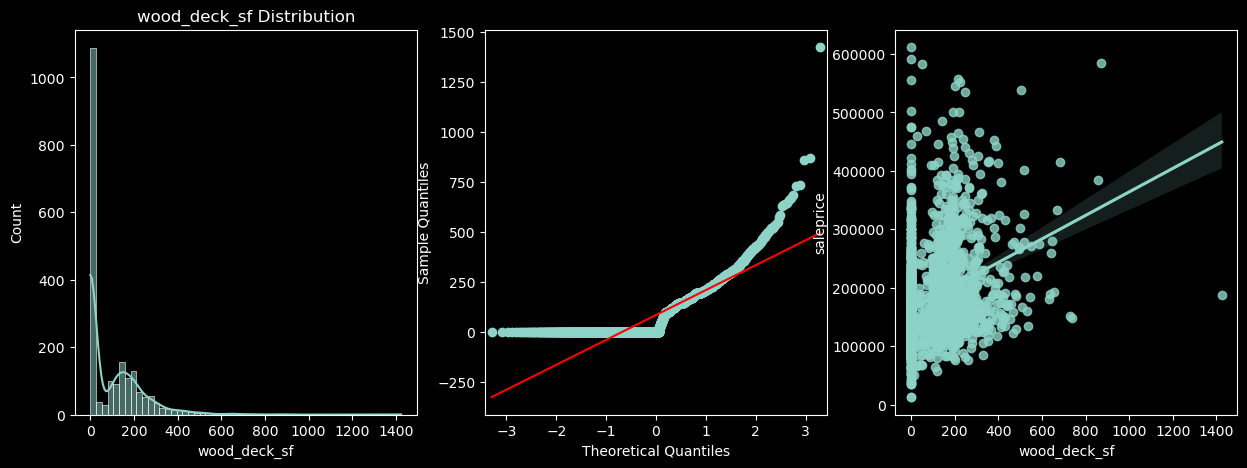

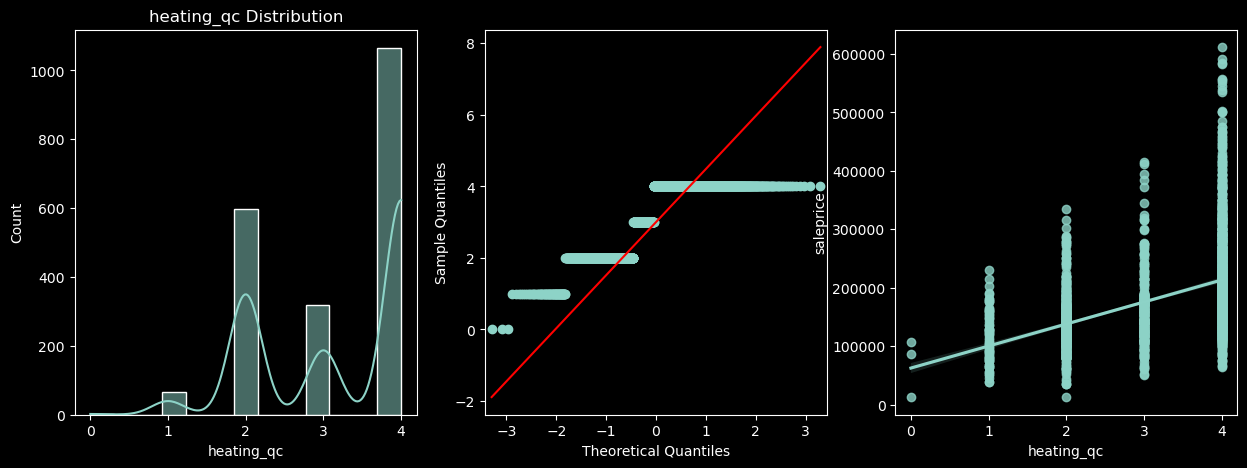

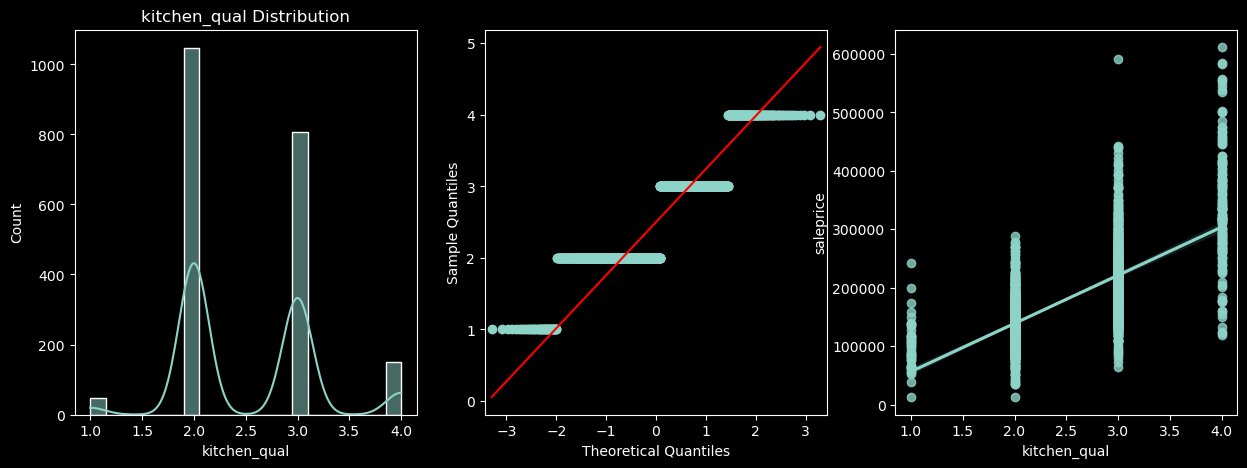

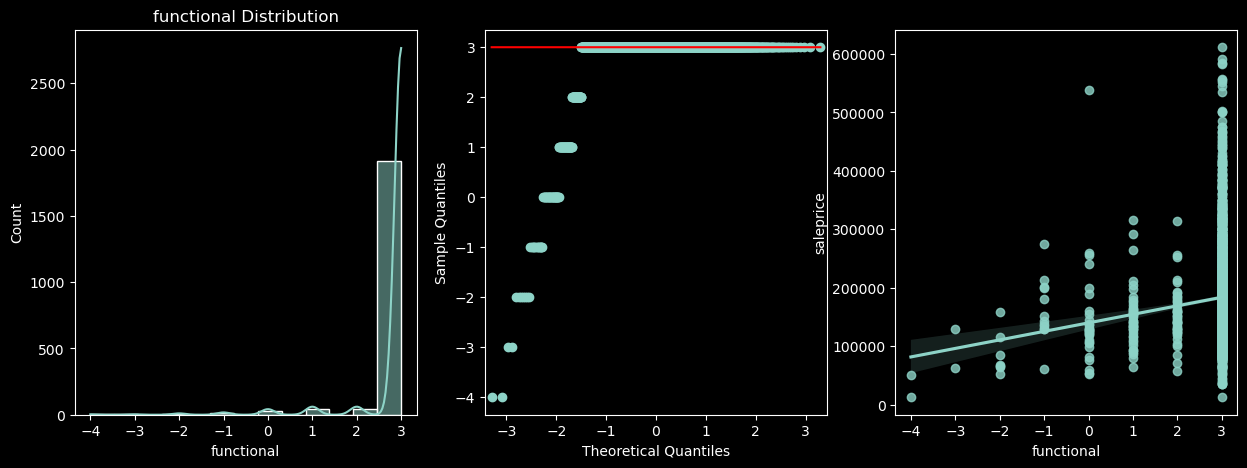

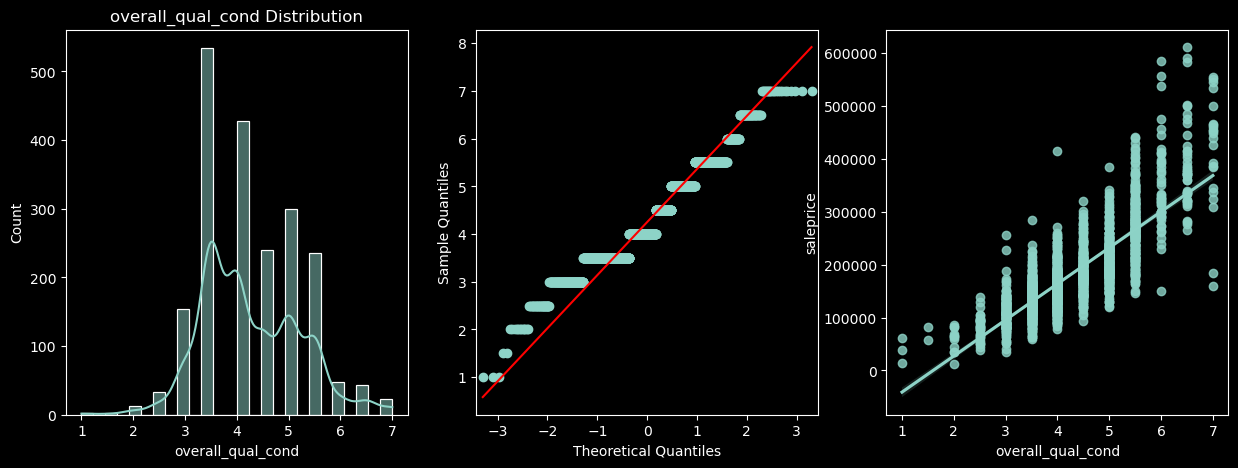

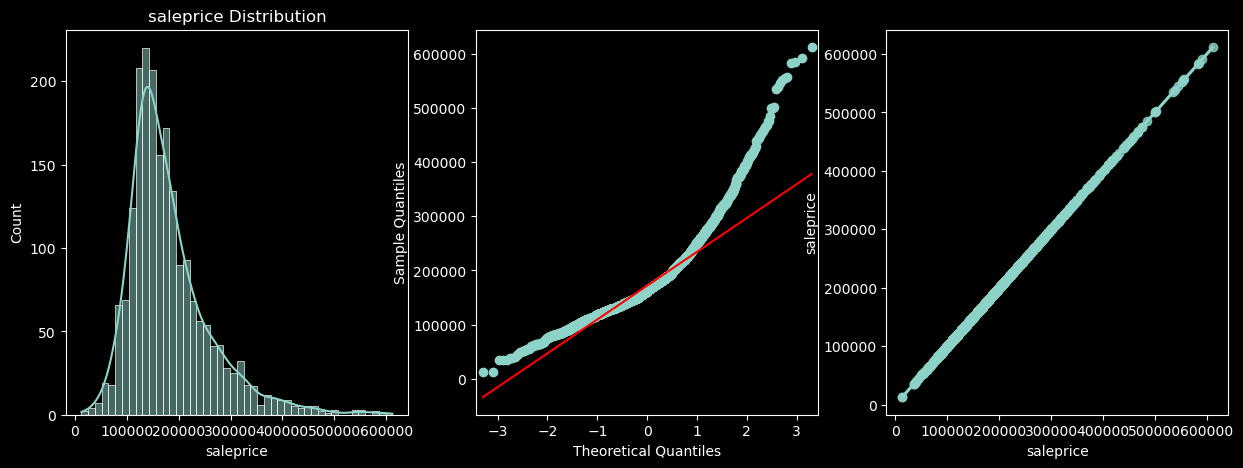

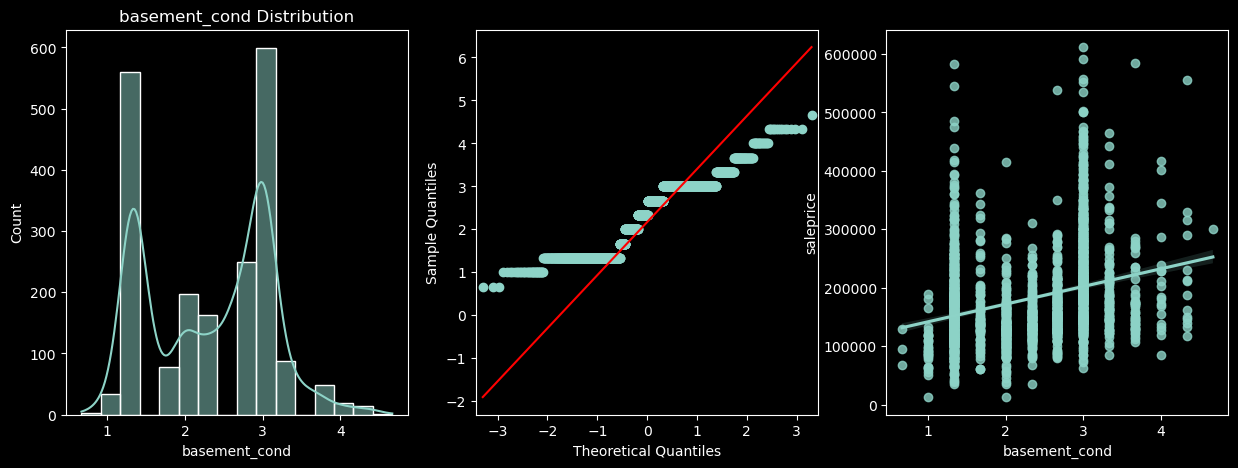

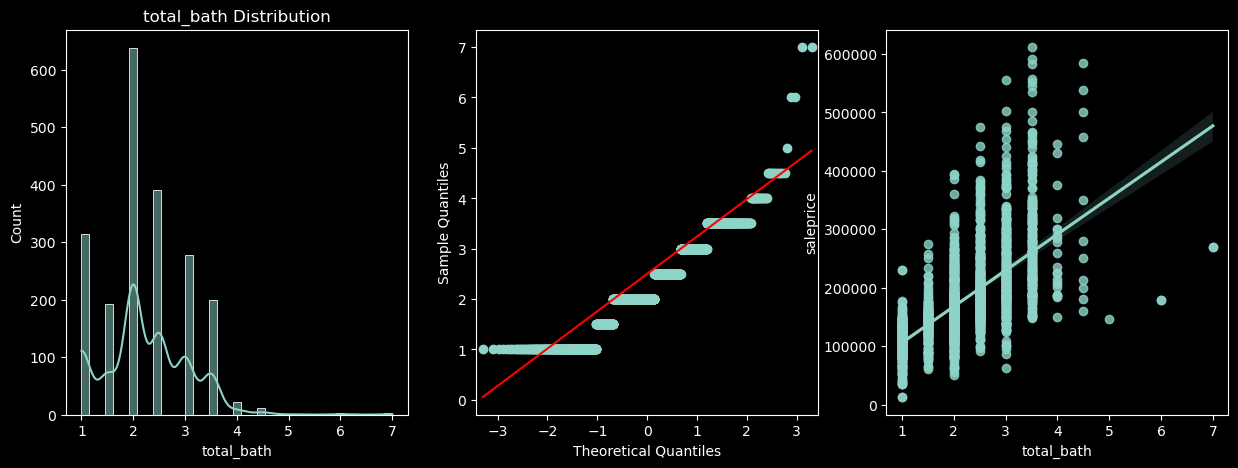

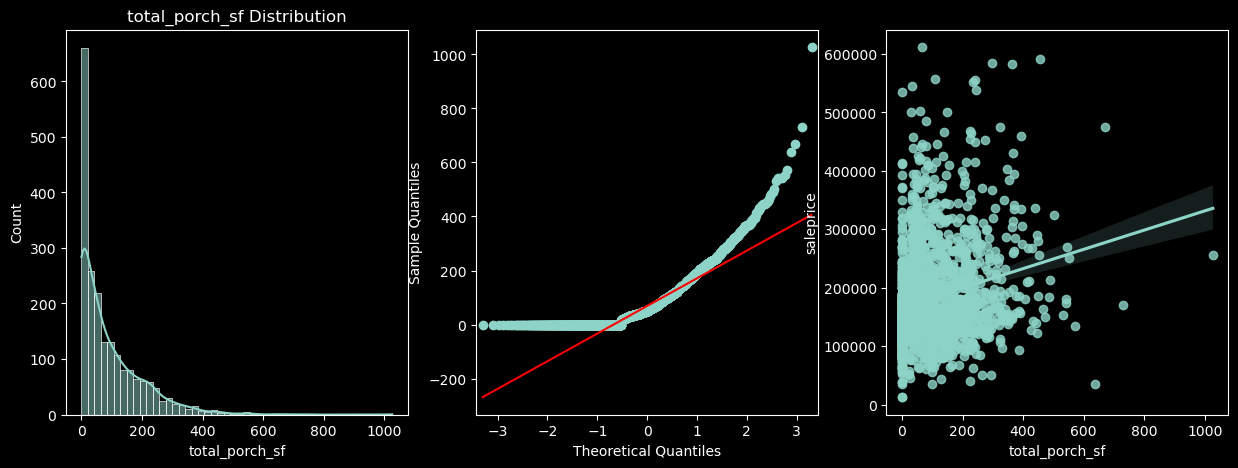

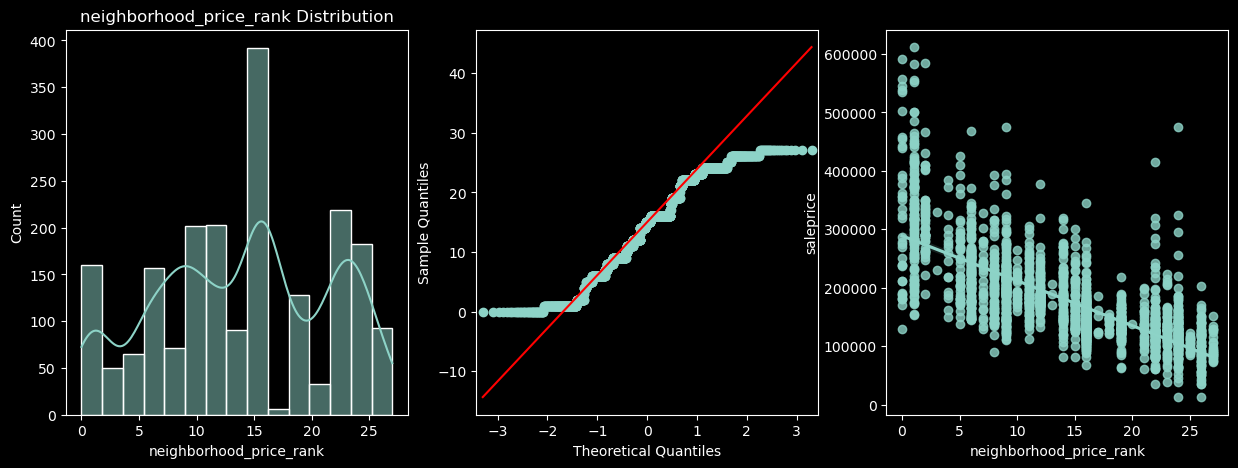

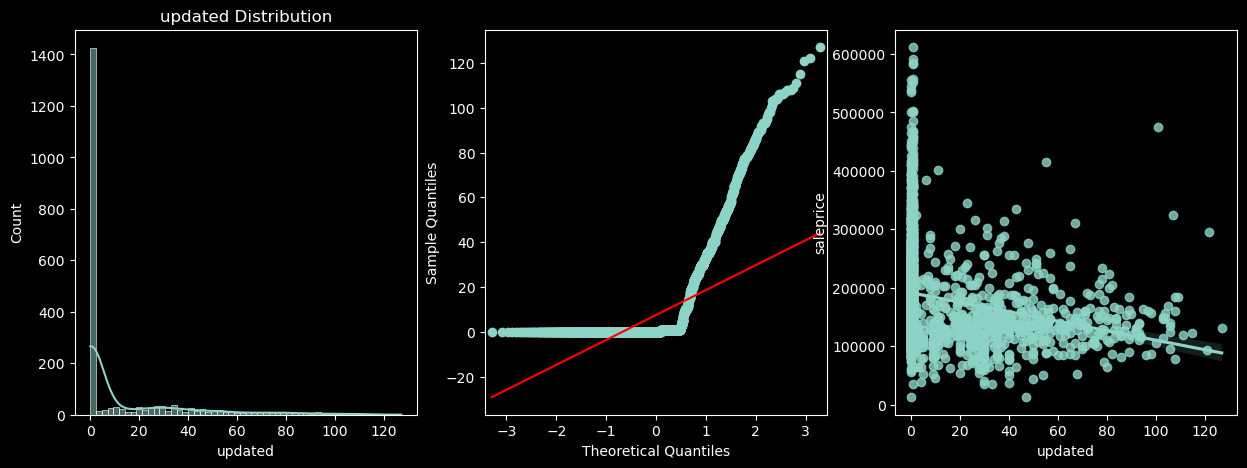

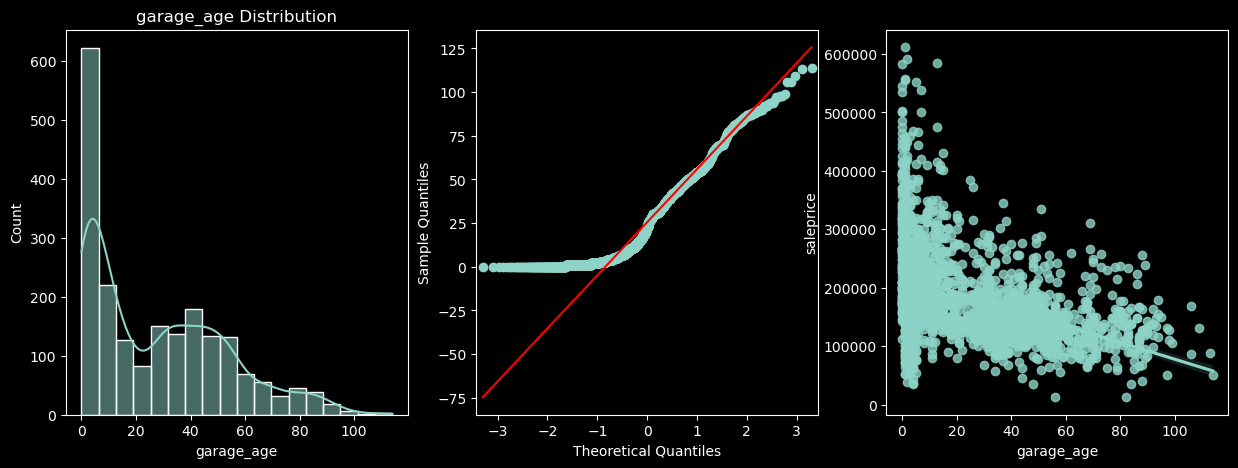

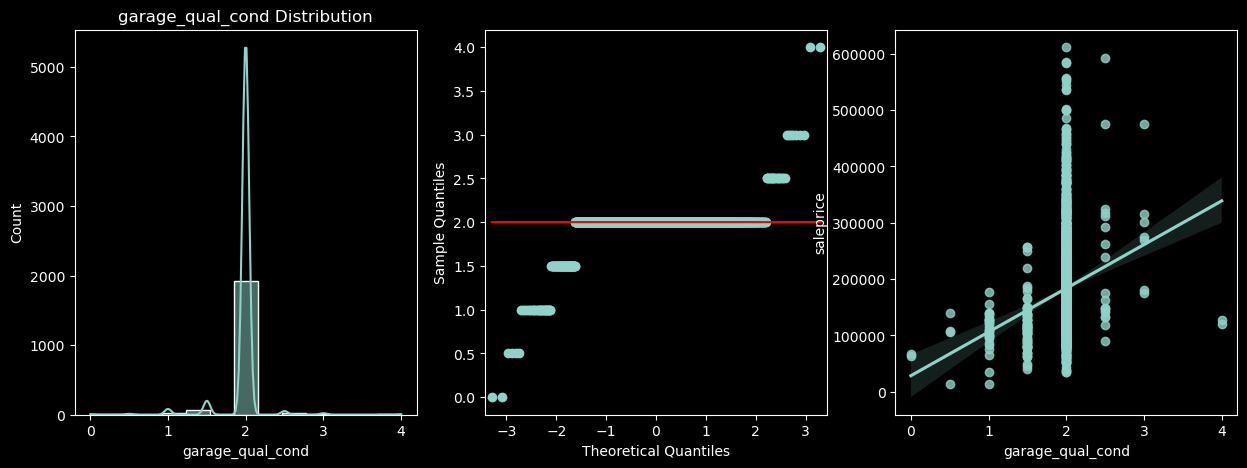

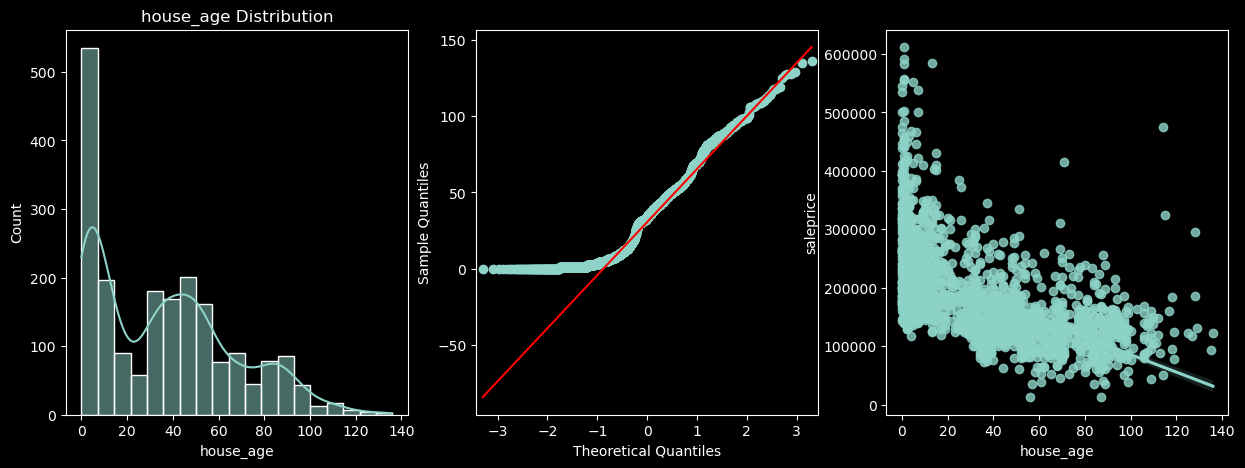

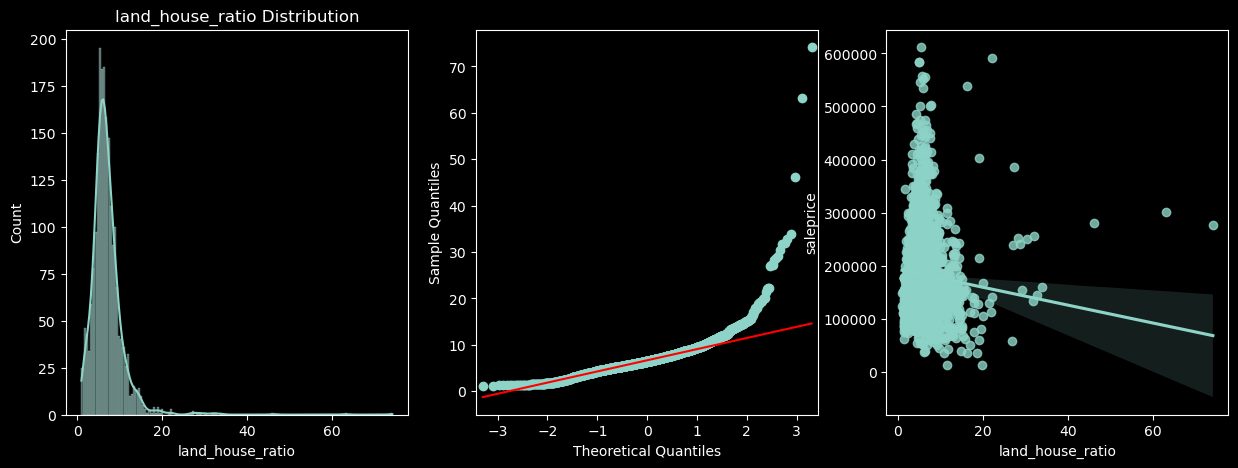

In [18]:
# plot all numeric features in correlative_factors that aren't boolean
non_boolean_correlative = house_train[[col for col in house_train[correlative_factors.keys()].select_dtypes(include=np.number).columns if house_train[col].max() - house_train[col].min() > 1]].columns

# use feature plot
feature_plot(house_train, non_boolean_correlative)

# Log Transform of Features

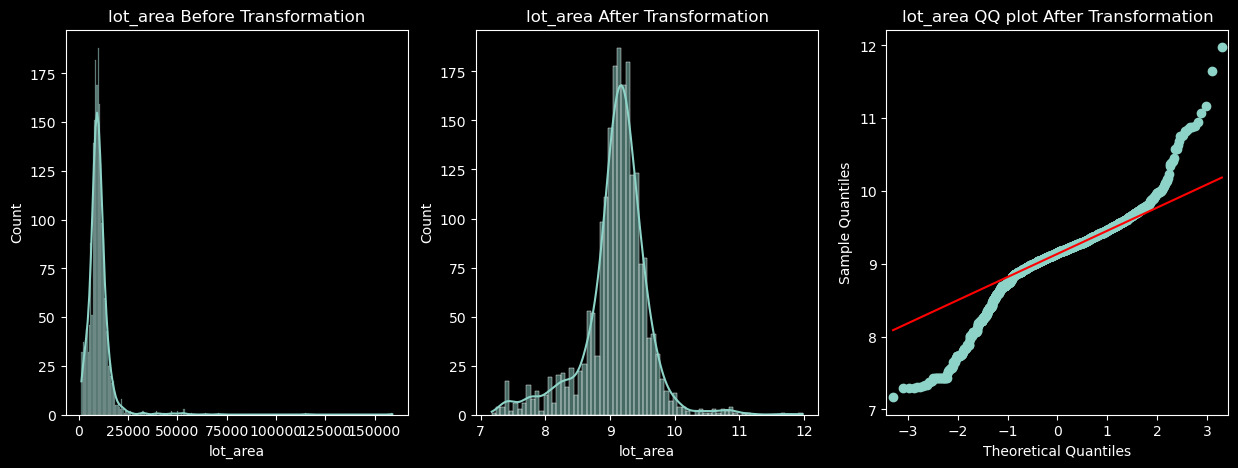

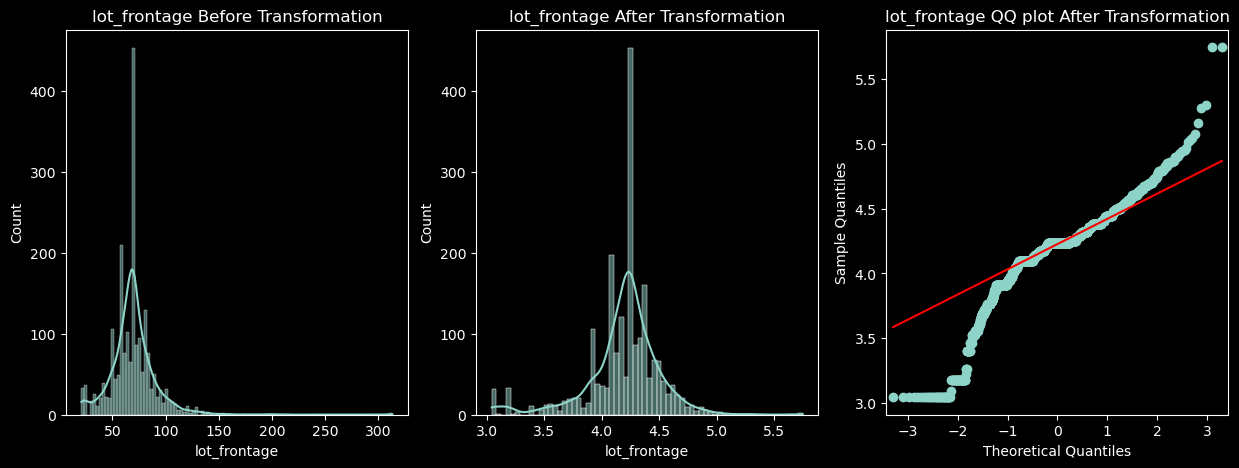

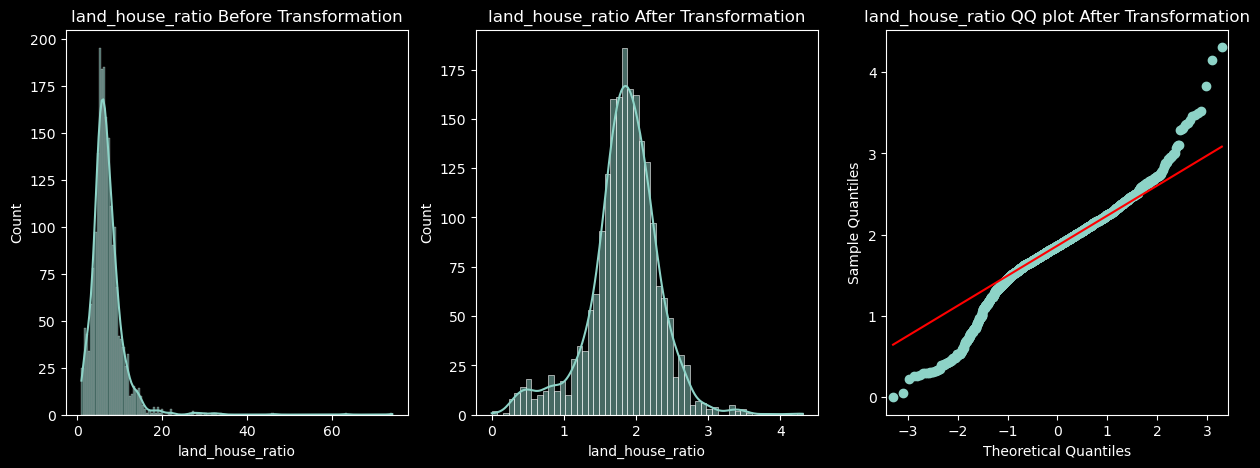

In [19]:
log_vars = ['lot_area', 'lot_frontage', 'land_house_ratio']
transformation_plot(house_train, log_vars, np.log)

# Sqrt Transform of Features

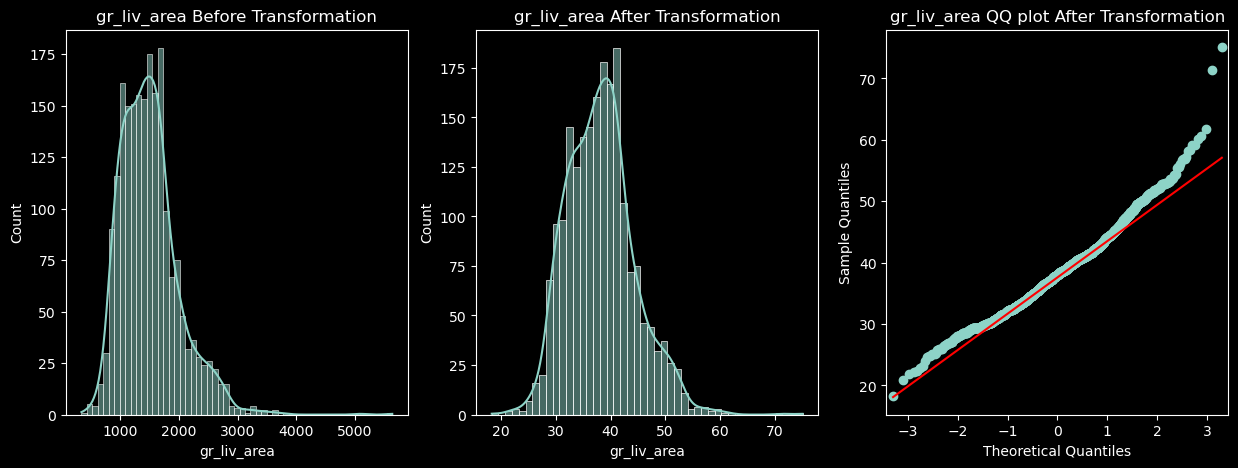

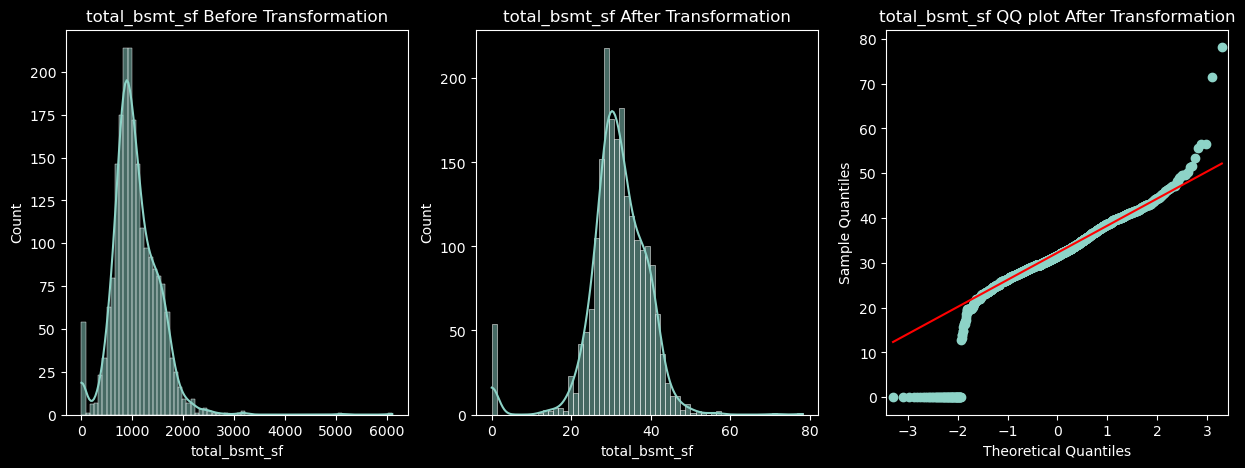

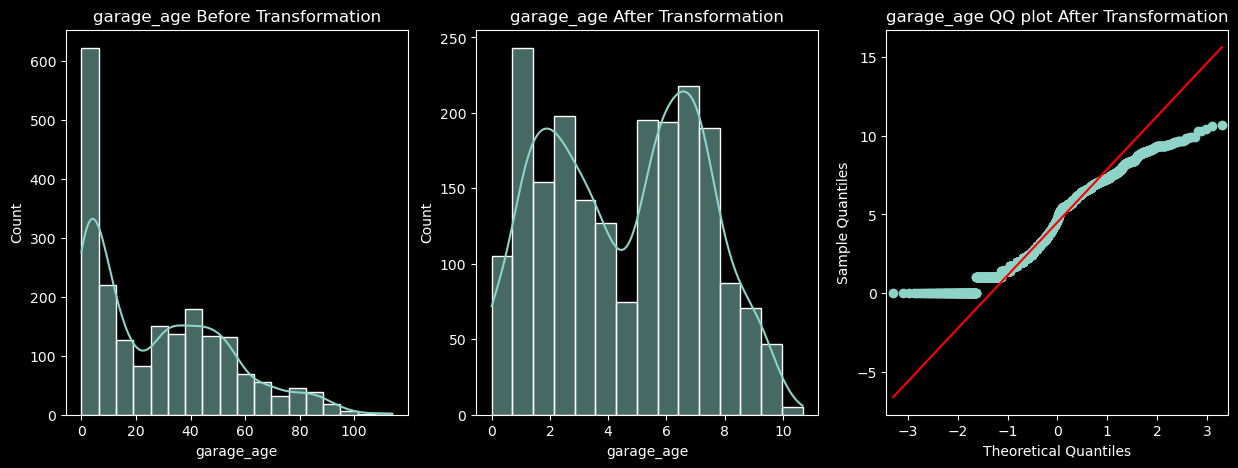

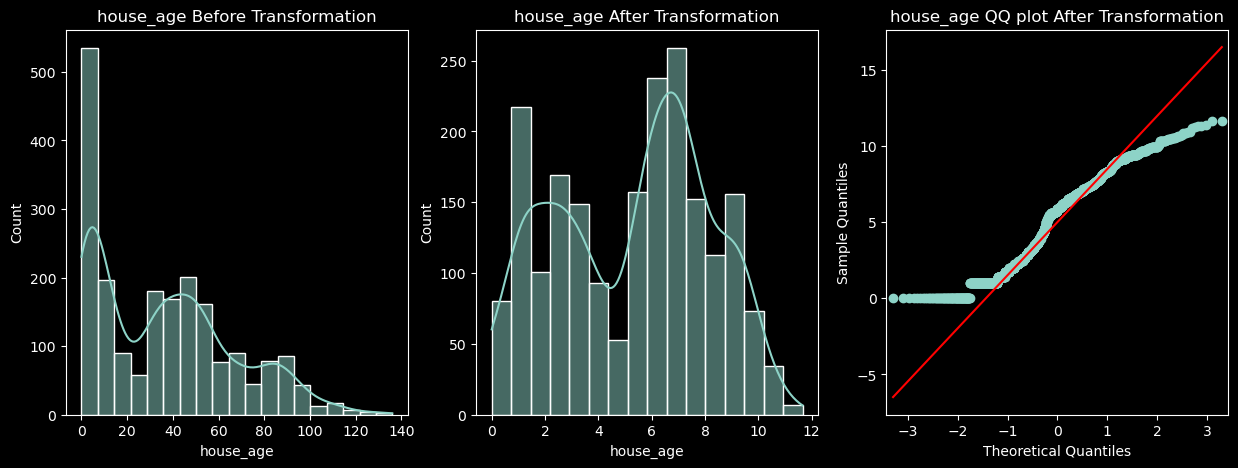

In [20]:
sqrt_vars = ['gr_liv_area', 'total_bsmt_sf', 'garage_age', 'house_age']

transformation_plot(house_train, sqrt_vars, np.sqrt)


# SalePrice Relationships

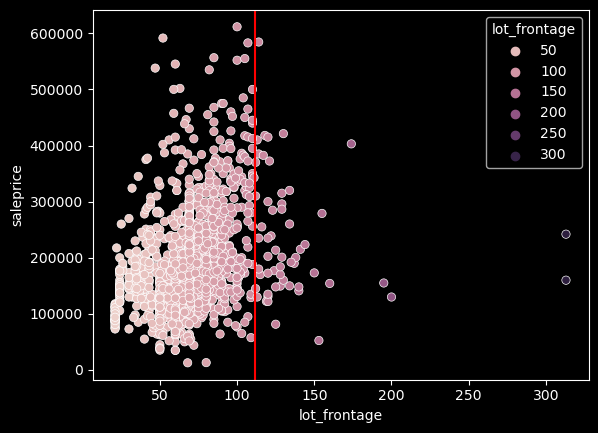

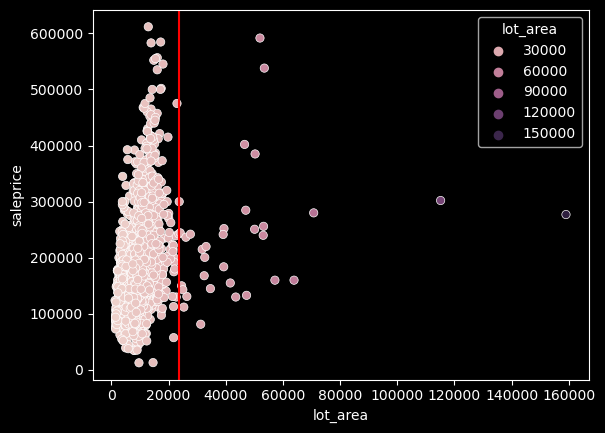

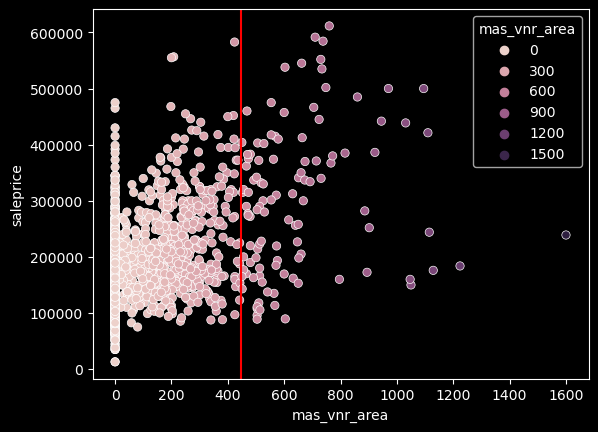

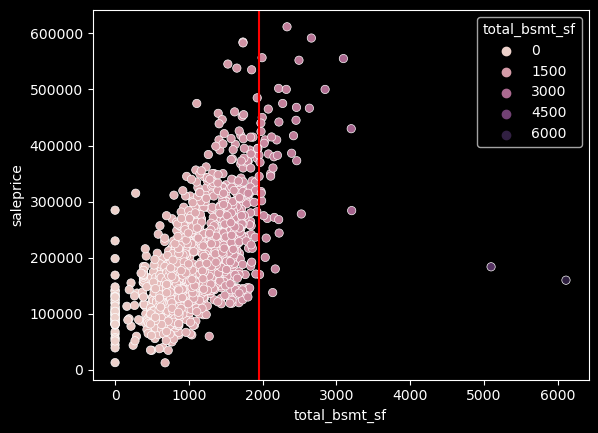

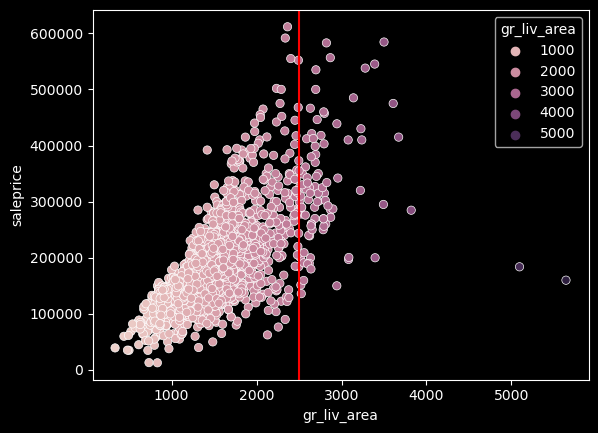

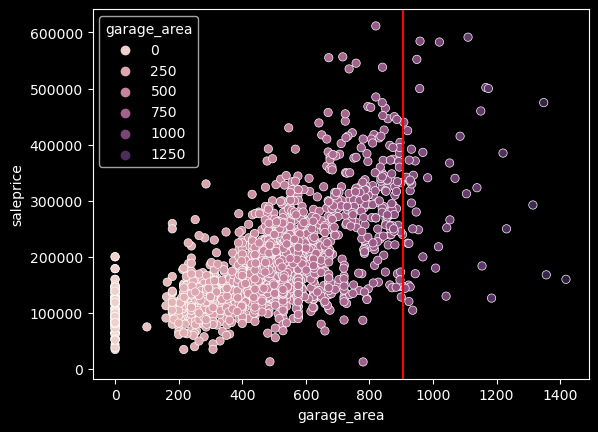

In [21]:
for x in ['lot_frontage', 'lot_area', 'mas_vnr_area', 'total_bsmt_sf', 'gr_liv_area', 'garage_area']:
    sns.scatterplot(x=x, y='saleprice', data=house_train, hue=x)
    # add vertical line at 3 standard deviations from the mean
    plt.axvline(house_train[x].mean() + 2*house_train[x].std(), color='r')

    plt.show()

In [22]:

def flag_outliers(df, std_thresh):
    for x in ['lot_frontage', 'lot_area', 'mas_vnr_area', 'total_bsmt_sf', 'gr_liv_area', 'garage_area']:
        df[x+'_outliers'] = [1 if x > df['lot_frontage'].mean() + std_thresh*df['lot_frontage'].std() else 0 
        for x in df['lot_frontage']]


In [23]:
flag_outliers(house_train, 2)
flag_outliers(house_test, 2)

In [24]:

# add '_outliers' to the end of each column name
outlier_cols = [x + '_outliers' for x in ['lot_frontage', 'lot_area', 'mas_vnr_area', 'total_bsmt_sf', 'gr_liv_area', 'garage_area']]
%store outlier_cols

Stored 'outlier_cols' (list)


In [25]:
# write back to improved csvs
house_train.to_csv('../datasets/house_train_improved.csv', index=False)
house_test.to_csv('../datasets/house_test_improved.csv', index=False)

In [26]:
house_train['lot_frontage_outliers'].sum()

57